# Real-world Data Wrangling

#import all the libraries 
import pandas as pd
from matplotlib import pyplot as plt
import zipfile
import seaborn as sns

## Table of Contents
<ul>
<li><a href="#Gather Data">1) Gather Data</a></li>
<li><a href="#Assess Data">2) Assess Data</a></li>
<li><a href="#Clean Data">3) Clean Data</a></li>
<li><a href="#Update your data store">4) Update your data store</a></li>
<li><a href="#Answer the research question">5) Answer the research question</a></li>
</ul>

In [27]:
#import all the libraries 
import pandas as pd
from matplotlib import pyplot as plt
import zipfile
import seaborn as sns


<a id='Gather Data'></a>
## 1. Gather data


### **1.1.** Problem Statement
In this project, data on mental health from students and tech employees will be gathered from two different datasets. The main purpose of the project is to showcase skills of data wrangling in terms of gathering, assessing, and cleaning data. During the assessment stage, I will assess the data for quality and structural issues to establish a cleaning strategy. The cleaning strategy will be implemented during the cleaning stage. Afterwards, all datasets will be combined and stored in a data store of choice. In the end, research questions will be answered by producing visualizations and conducting analysis.

### **1.2.** Gather datasets

# Dataset 1: Students Mental Health Assessments

type: CSV File .

Method: The data was gathered using the "Downloading files" method from the Kaggle website.


The source: https://www.kaggle.com/datasets/sonia22222/students-mental-health-assessments/data

Dataset variables:
*   *Age*

*   *Course: student's major or field of study.*

*   *Gender*

*   *CGPA: Cumulative Grade Point Average.*

*   *Stress_Level: The level of stress experienced by the individual.*

*   *Depression_Score: The score representing the level of depression experienced by the individual.*

*   *Anxiety_Score: The score representing the level of anxiety experienced by the individual.*

*   *Sleep_Quality: The quality of sleep experienced by the individual .*

*   *Physical_Activity: The level of physical activity .*

*   *Diet_Quality: The quality of the individual's diet.*

*   *Social_Support: The level of social support received by the individual.*

*   *Substance_Use: The frequency of substance use such as alcohol, cigarettes or other drugs.* 

*   *Counseling_Service_Use: refers to whether or not the student has utilized counseling services provided by their educational institution.*

*   *Family_History: Whether the individual has a family history of mental health issues.*

*   *Chronic_Illness: Financial_Stress: The level of financial stress experienced by the individual (between 0 and 5).*

*   *Financial_Stress*	

*   *Extracurricular_Involvement*

*   *Semester_Credit_Load: The number of credits the individual is taking in the semester (15-30).*
*   *Residence_Type: on or off campus.*

#### **Dataset 1**



In [28]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [29]:
!mkdir -p ~/.kaggle

In [30]:
# Create the .kaggle directory
!mkdir -p ~/.kaggle

# Move the kaggle.json file to the .kaggle directory
!mv kaggle.json ~/.kaggle/

# Change the permissions of the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory


In [31]:
!kaggle datasets download -d sonia22222/students-mental-health-assessments/data

/usr/bin/sh: 1: kaggle: not found


In [32]:
# Load dataset 1
#students_df = pd.read_csv('students_mental_health_survey.csv')
import requests

# URL of the dataset file from Kaggle
url = 'https://www.kaggle.com/datasets/sonia22222/students-mental-health-assessments/download'

# Set your Kaggle username and API key (replace with your actual Kaggle credentials)
kaggle_username = 'your_kaggle_username'
kaggle_key = 'your_kaggle_api_key'

# Construct the headers with authorization details
headers = {
    'x-kaggle-username': kaggle_username,
    'x-kaggle-authorization': kaggle_key
}

# Make a GET request to Kaggle for downloading the dataset
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the dataset file
    with open('students_mental_health.zip', 'wb') as f:
        f.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Failed to download dataset. Status code: {response.status_code}")


Dataset downloaded successfully.


In [33]:
students_df = pd.read_csv('students_mental_health_survey.csv')

In [34]:
students_df.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


# Dataset 2: Mental Health in Tech Survey

#### Dataset 2

Type: CSV File.

Method: manually downloaded from the Kaggle website.

The source: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

Dataset variables:

*   *Timestamp*
*   *Age*
*   *Gender*
*   *Country*
*   *state: If you live in the United States, which state or territory do you live in?*
*   *self_employed: Are you self-employed?*
*   *family_history: Do you have a family history of mental illness?*
*   *treatment: Have you sought treatment for a mental health condition?*
*   *work_interfere: If you have a mental health condition, do you feel that it interferes with your work?*
*   *no_employees: How many employees does your company or organization have?*
*   *remote_work: Do you work remotely (outside of an office) at least 50% of the time?*
*   *tech_company: Is your employer primarily a tech company/organization?*
*   *benefits: Does your employer provide mental health benefits?*
*   *care_options: Do you know the options for mental health care your employer provides?*
*   *wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?*
*   *seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?*
*   *anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?*
*   *leave: How easy is it for you to take medical leave for a mental health condition?*
*   *mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?*
*   *phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?*
*   *coworkers: Would you be willing to discuss a mental health issue with your coworkers?*
*   *supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?*
*   *mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?*
*   *phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?*
*   *mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?*
*   *obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?*
*   *comments: Any additional notes or comments*

In [35]:
# Load dataset 1
employees_df = pd.read_csv('survey.csv')

In [36]:
employees_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [37]:
#Optional: store the raw data in your local data store

# Save students_df as CSV
students_df.to_csv('students_data_raw.csv', index=False)

# Save employees as CSV
employees_df.to_csv('employees_data_raw.csv', index=False)

In [38]:
# Make copies of the datasets
students_df_raw = students_df.copy()
employees_df_raw = employees_df.copy()

In [39]:
#### First we are going to drop the columns that we won't need in our analysis to be able to foucs in what important
students_df.drop(['CGPA', 'Relationship_Status', 'Extracurricular_Involvement', 
                  'Semester_Credit_Load'], axis=1, inplace=True)

students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     7022 non-null   int64 
 1   Course                  7022 non-null   object
 2   Gender                  7022 non-null   object
 3   Stress_Level            7022 non-null   int64 
 4   Depression_Score        7022 non-null   int64 
 5   Anxiety_Score           7022 non-null   int64 
 6   Sleep_Quality           7022 non-null   object
 7   Physical_Activity       7022 non-null   object
 8   Diet_Quality            7022 non-null   object
 9   Social_Support          7022 non-null   object
 10  Substance_Use           7007 non-null   object
 11  Counseling_Service_Use  7022 non-null   object
 12  Family_History          7022 non-null   object
 13  Chronic_Illness         7022 non-null   object
 14  Financial_Stress        7022 non-null   int64 
 15  Resi

In [40]:
employees_df.drop(['Timestamp', 'Country', 'state', 'self_employed', 'work_interfere', 'no_employees', 
                   'tech_company', 'benefits', 'care_options', 'wellness_program', 'anonymity', 'leave', 
                   'mental_health_consequence', 'phys_health_consequence', 'mental_health_interview',
                  'phys_health_interview', 'seek_help', 'mental_vs_physical', 'obs_consequence', 'comments'], axis=1, inplace=True)

employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             1259 non-null   int64 
 1   Gender          1259 non-null   object
 2   family_history  1259 non-null   object
 3   treatment       1259 non-null   object
 4   remote_work     1259 non-null   object
 5   coworkers       1259 non-null   object
 6   supervisor      1259 non-null   object
dtypes: int64(1), object(6)
memory usage: 69.0+ KB


In [41]:
# Make copies of the datasets now that we have it more focus for our analysis
students_df_raw_focus = students_df.copy()
employees_df_raw_focus = employees_df.copy()

In [42]:
# Save students_df_raw_focus as CSV
students_df_raw_focus.to_csv('students_data_raw_focus.csv', index=False)

# Save employees_df_raw_focus as CSV
employees_df_raw_focus.to_csv('employees_data_raw_focus.csv', index=False)

<a id='Assess Data'></a>
## 2. Assess data

### Student Dataset:

In this analysis, we are focusing on students studing for bachelor's degree who are at most will be 25 years old. so in our student dataset, we are specifically looking for students who meet these requirements.


In [43]:
# having overall look
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     7022 non-null   int64 
 1   Course                  7022 non-null   object
 2   Gender                  7022 non-null   object
 3   Stress_Level            7022 non-null   int64 
 4   Depression_Score        7022 non-null   int64 
 5   Anxiety_Score           7022 non-null   int64 
 6   Sleep_Quality           7022 non-null   object
 7   Physical_Activity       7022 non-null   object
 8   Diet_Quality            7022 non-null   object
 9   Social_Support          7022 non-null   object
 10  Substance_Use           7007 non-null   object
 11  Counseling_Service_Use  7022 non-null   object
 12  Family_History          7022 non-null   object
 13  Chronic_Illness         7022 non-null   object
 14  Financial_Stress        7022 non-null   int64 
 15  Resi

### Issue : having some student that don't meet our requirements

In [44]:
#### Having medical student

<Axes: xlabel='Course'>

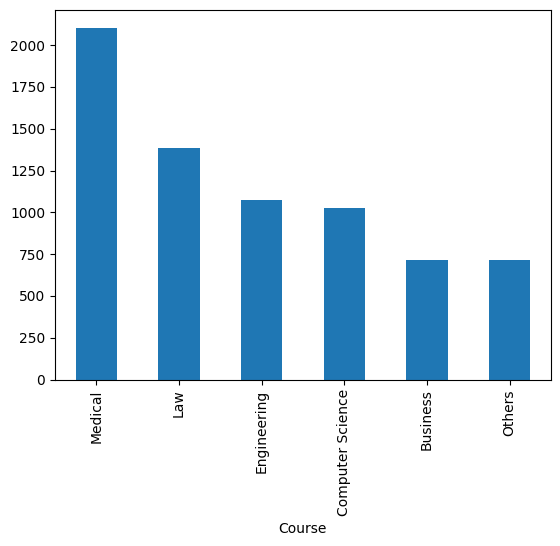

In [45]:
#Inspecting the dataframe visually
course_counts = students_df['Course'].value_counts()
course_counts.plot(kind='bar')

In [46]:
#Inspecting the dataframe programmatically
students_df['Course'].unique()

array(['Others', 'Engineering', 'Business', 'Computer Science', 'Medical',
       'Law'], dtype=object)

Issue and justification: we discovered that we have medical students in our dataset. Since medical students do not study for a bachelor's degree, it wouldn't make sense to compare them with our dataset of employees in the tech field. Therefore, we decided to drop them from our dataset.

#### Having students with a residence type of "With Family" 

<Axes: xlabel='Residence_Type'>

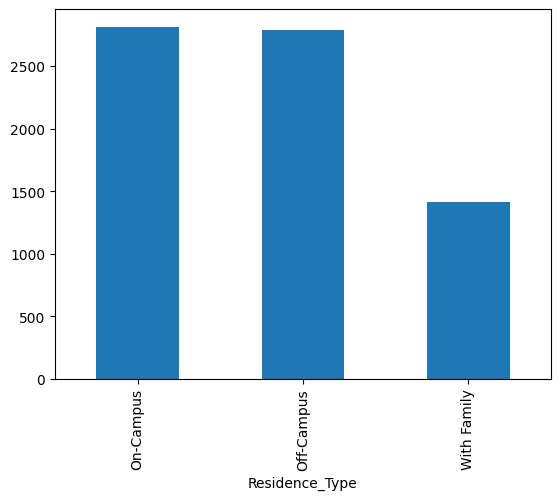

In [47]:
#Inspecting the dataframe visually
residence_Type_counts = students_df['Residence_Type'].value_counts()
residence_Type_counts.plot(kind='bar')

In [48]:
#Inspecting the dataframe programmatically
students_df['Residence_Type'].unique()

array(['On-Campus', 'Off-Campus', 'With Family'], dtype=object)

Issue and justification: we found students with a residence type of "With Family" in our dataset. This term is ambiguous for us because we are trying to determine if socializing has an effect on students and employees. To maintain clarity and consistency in our analysis, we decided to drop these students as well.

#### having students with age > 25

<Axes: xlabel='Age'>

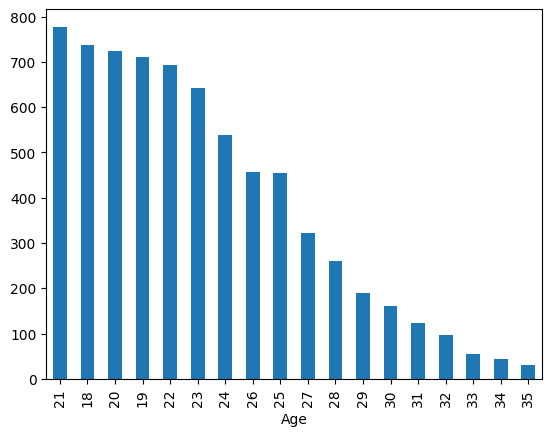

In [49]:
#Inspecting the dataframe visually
age_counts = students_df['Age'].value_counts()
age_counts.plot(kind='bar')

In [50]:
#Inspecting the dataframe programmatically
students_df['Age'].unique()

array([25, 24, 19, 18, 21, 23, 28, 22, 27, 20, 31, 26, 35, 30, 32, 29, 34,
       33])

Issue and justification: we identified students with an age greater than 25, which does not match our requirements. Therefore, we decided to drop them from our analysis.

### Employees Dataset

In [51]:
# having overall look
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             1259 non-null   int64 
 1   Gender          1259 non-null   object
 2   family_history  1259 non-null   object
 3   treatment       1259 non-null   object
 4   remote_work     1259 non-null   object
 5   coworkers       1259 non-null   object
 6   supervisor      1259 non-null   object
dtypes: int64(1), object(6)
memory usage: 69.0+ KB


so we are sure we don't have any missing value in this dataset or null value and data types are correct :) but let's ;et's have deep look our data and try to finf hidden qulity issue.

Issue and justification: *FILL IN*

### Quality Issue 1: Accuracy issue with with gender column

<Axes: xlabel='Gender'>

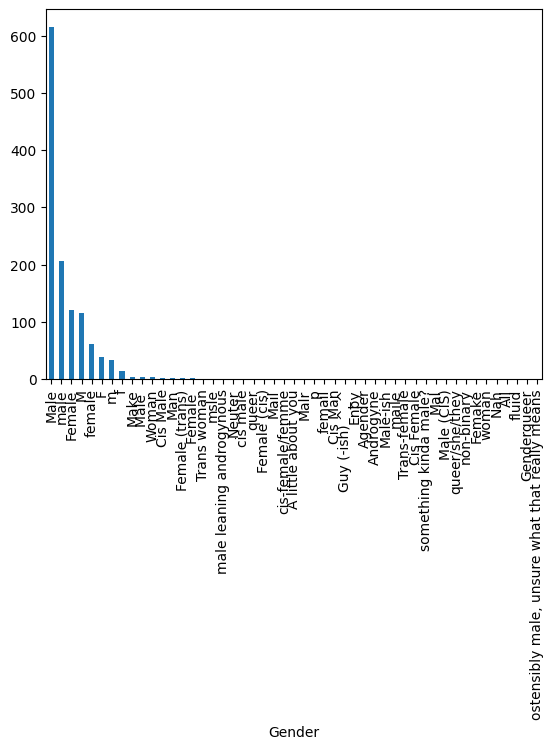

In [52]:
#Inspecting the dataframe visually
gender_counts = employees_df['Gender'].value_counts()
gender_counts.plot(kind='bar')

In [53]:
employees_df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

Issue and justification: 'A little about you' , 'Nah', 'p', 'All' are all inaccuracy values for Gender.

### Quality Issue 2: inconsistency with gender column

<Axes: xlabel='Gender'>

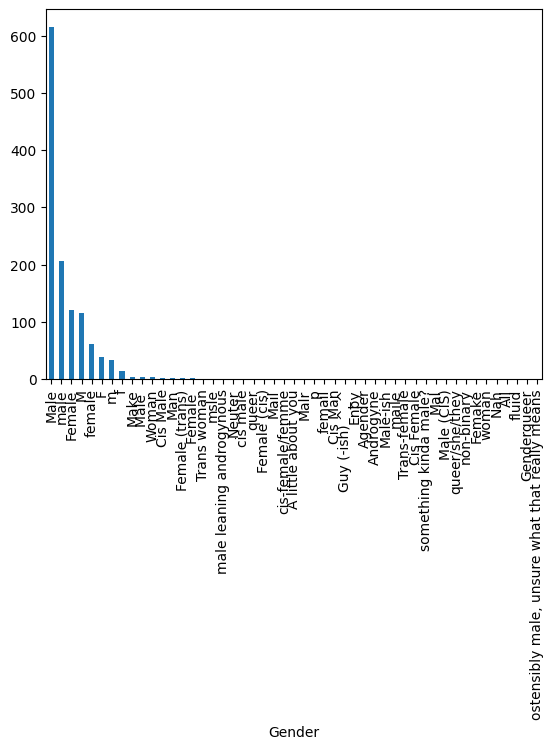

In [54]:
#Inspecting the dataframe visually
gender_counts = employees_df['Gender'].value_counts()
gender_counts.plot(kind='bar')

In [55]:
employees_df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [56]:
gender_counts

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

In [57]:
#let's have look at students dataset too
students_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Issue and justification: since our student dataset only includes 'male' and 'female' categories, we will keep it this way to ensure fair comparisons. Our plan is to convert variations such as 'm,' 'M,' 'male,' 'Male,' 'man,' etc. to 'Male' This approach will help standardize the representation of gender in our dataset and maintain consistency. By doing so, we can conduct a fair analysis and make meaningful comparisons between the male and female categories.

### Sudents dataset

### Issue : The structure of the "Counseling_Service_Use" column in students dataset

<Axes: xlabel='Counseling_Service_Use'>

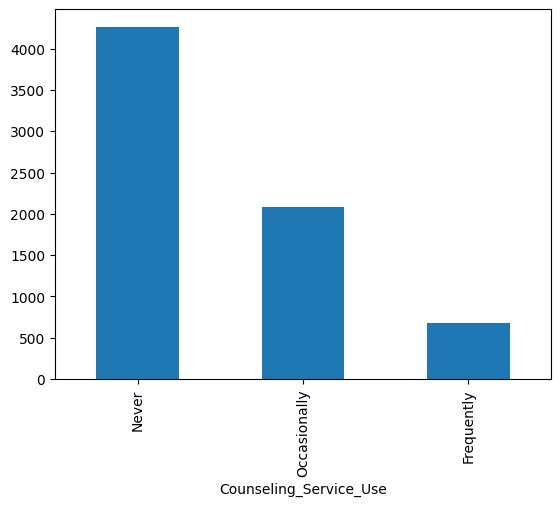

In [58]:
#FILL IN - Inspecting the dataframe visually
service_Use_counts = students_df['Counseling_Service_Use'].value_counts()
service_Use_counts.plot(kind='bar')

In [59]:
#FILL IN - Inspecting the dataframe programmatically
students_df['Counseling_Service_Use'].unique()

array(['Never', 'Occasionally', 'Frequently'], dtype=object)

Issue and justification: We want to know if counseling service used or not so it will be more tidy to have binary values like 'Yes' and 'No' instead of the current categorical values. This would make the dataset more consistent and easier to analyze.

Issue and justification: *FILL IN*

### Tidiness Issue 1: Multiple Observational Units in a Single Table

In [60]:
students_df.head()

,Age,Course,Gender,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Residence_Type
0,25,Others,Male,3,3,2,Good,Moderate,Good,Moderate,Never,Never,No,No,2,On-Campus
1,24,Engineering,Female,0,3,0,Average,Low,Average,Low,Occasionally,Occasionally,No,No,3,On-Campus
2,19,Business,Female,4,0,3,Good,Low,Average,Moderate,Never,Occasionally,No,No,4,On-Campus
3,19,Computer Science,Male,2,1,0,Average,Low,Average,Moderate,NaN,Never,No,No,4,Off-Campus
4,18,Business,Male,3,3,4,Good,Low,Average,High,Never,Never,No,Yes,0,On-Campus


In [61]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     7022 non-null   int64 
 1   Course                  7022 non-null   object
 2   Gender                  7022 non-null   object
 3   Stress_Level            7022 non-null   int64 
 4   Depression_Score        7022 non-null   int64 
 5   Anxiety_Score           7022 non-null   int64 
 6   Sleep_Quality           7022 non-null   object
 7   Physical_Activity       7022 non-null   object
 8   Diet_Quality            7022 non-null   object
 9   Social_Support          7022 non-null   object
 10  Substance_Use           7007 non-null   object
 11  Counseling_Service_Use  7022 non-null   object
 12  Family_History          7022 non-null   object
 13  Chronic_Illness         7022 non-null   object
 14  Financial_Stress        7022 non-null   int64 
 15  Resi

 Issue and justification: the original students_df dataframe contains multiple observational units, where each row represents a combination of information about a student's personal attributes, mental health scores, and lifestyle factors.

### Tidiness Issue 2:  Discrepancy in Mental Health Support Columns between Employees and Students Datasetss

In [62]:
#FILL IN - Inspecting the dataframe visually
employees_df.head()

,Age,Gender,family_history,treatment,remote_work,coworkers,supervisor
0,37,Female,No,Yes,No,Some of them,Yes
1,44,M,No,No,No,No,No
2,32,Male,No,No,No,Yes,Yes
3,31,Male,Yes,Yes,No,Some of them,No
4,31,Male,No,No,Yes,Some of them,Yes


In [63]:
#FILL IN - Inspecting the dataframe programmatically
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             1259 non-null   int64 
 1   Gender          1259 non-null   object
 2   family_history  1259 non-null   object
 3   treatment       1259 non-null   object
 4   remote_work     1259 non-null   object
 5   coworkers       1259 non-null   object
 6   supervisor      1259 non-null   object
dtypes: int64(1), object(6)
memory usage: 69.0+ KB


Issue and justification: The issue at hand is that in the employees dataset, there are two columns named "coworkers" and "supervisor" that indicate whether an employee would be willing to discuss a mental health issue with their coworkers and direct supervisors, respectively. However, in the students dataset, there is a single column named "social_support" that represents whether students social support 'Moderate', 'Low', 'High'. To continue the analysis and compare the two datasets, it is necessary to address this discrepancy.

<a id='Clean Data'></a>
## 3. Clean data



* Note: "Make copies of the datasets to ensure the raw dataframes" is alredy done after gathering data

In [64]:
### **Issue : having some student that don't meet our requirements**

In [65]:
# The cleaning strategy: drop Medical student
students_df = students_df.drop(students_df[students_df['Course'] == 'Medical'].index)

In [66]:
# Validate the cleaning was successful: Medical students are no longer exist in our dataset
students_df['Course'].unique()

array(['Others', 'Engineering', 'Business', 'Computer Science', 'Law'],
      dtype=object)

In [67]:
# The cleaning strategy: drop with familly
students_df = students_df.drop(students_df[students_df['Residence_Type'] == 'With Family'].index)

In [68]:
# Validate the cleaning was successful: students with "with familly" as Residence_Type are no longer exist in our dataset
students_df['Residence_Type'].unique()

array(['On-Campus', 'Off-Campus'], dtype=object)

In [69]:
# The cleaning strategy: drop age > 25 
students_df = students_df.drop(students_df[students_df['Age'] > 25].index)

In [70]:
# Validate the cleaning was successful: there is longer age > 25
students_df['Age'].unique()

array([25, 24, 19, 18, 21, 23, 22, 20])

Justification: By applying these filters and dropping the irrelevant data, we can focus on the specific group of students that meet our requirements for this analysis.

###  Quality Issue 1: Accuracy issue with gender column & Quality Issue 2: inconsistency with gender column### **Quality Issue 1: FILL IN**

The cleaning strategy: first we will convert the values ['male', 'M', 'm', 'Man'] to 'Male' and convert the values ['female', 'F', 'f', 'Woman'] to 'Female' and drop the rest this will help us with both data quality Issue we found in the gender column

In [71]:
#### Step 1: Dropping

In [72]:
employees_df = employees_df[employees_df['Gender'].isin(['Male', 'male', 'M', 'm', 'Man', 'Female', 'female', 'F', 'f', 'Woman'])]

In [73]:
# Validate 
gender_counts = employees_df['Gender'].value_counts()
gender_counts

Gender
Male      615
male      206
Female    121
M         116
female     62
F          38
m          34
f          15
Woman       3
Man         2
Name: count, dtype: int64

#### Step 2: convert the values

In [74]:
# convert the values
gender_mapping = {'Male': ['Male', 'male', 'M', 'm', 'Man'],
                  'Female': ['Female', 'female', 'F', 'f', 'Woman']}
# Iterate over each key-value pair in the gender_mapping dictionary
for gender, variations in gender_mapping.items():
    employees_df['Gender'] = employees_df['Gender'].replace(variations, gender)

In [75]:
# Validate 
gender_counts = employees_df['Gender'].value_counts()
gender_counts

Gender
Male      973
Female    239
Name: count, dtype: int64

Justification: This approach will help standardize the representation of gender in our dataset and maintain consistency. By doing so, we can conduct a fair analysis and make meaningful comparisons between the male and female categories in both datasets.

### Issue: The structure of the "Counseling_Service_Use" column in students dataset**

In [76]:
#Apply the cleaning strategy
service_use_mapping = {'Yes': ['Occasionally', 'Frequently'],
                  'No': ['Never']}
for value, service_use in service_use_mapping.items():
    students_df['Counseling_Service_Use'] = students_df['Counseling_Service_Use'].replace(service_use, value)

In [77]:
#FILL IN - Validate the cleaning was # Validate the cleaning was successful
students_df['Counseling_Service_Use'].unique()

array(['No', 'Yes'], dtype=object)

In [78]:
# check the employees dataset
employees_df['treatment'].unique()

array(['Yes', 'No'], dtype=object)

Justification: To ensure consistency and facilitate the merging process, we need to modify the categorical values in the "social_support" column of the student dataset and the "treatment" column of the employee dataset. Specifically, we will change the categorical values in both columns to "Yes" and "No". This adjustment will enable us to merge the columns effectively and accurately compare the data between the two datasets.

In [79]:
students_df.reset_index(inplace=True)
students_df.rename(columns={'index': 'id'}, inplace=True)

In [80]:
# Split the data into two separate tables
influences_df = students_df[['id', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 
                              'Diet_Quality','Substance_Use', 'Chronic_Illness', 'Financial_Stress']]

In [81]:
students_df = students_df[['id', 'Gender', 'Course','Social_Support', 'Counseling_Service_Use', 
                           'Family_History'  , 'Residence_Type']]

In [82]:
# saving data

# Save influences_df as CSV
influences_df.to_csv('students_influences_df.csv', index=False)

# Save students_df as CSV
students_df.to_csv('students_data_without_influences.csv', index=False)

Justification: By splitting the data into two separate tables (influences_df and students_df), the code aims to separate different observational units into distinct tables, making the data more organized and easier to analyze.

### **Tidiness Issue 2: Discrepancy in Mental Health Support Columns between Employees and Students Datasets**

The students have 'Moderate', 'Low', and 'High' as values for the 'Social_Support' attribute, while employees have 'Some of them', 'No', and 'Yes' for both 'coworkers' and 'supervisor'. Considering that the students' 'Social_Support' attribute is more general and may include family support, we will work with the available data by mapping it as follows:

* 'Some of them' will be mapped to 'Moderate'
* 'No' will be mapped to 'Low'
* 'Yes' will be mapped to 'High'

Additionally, we will select the highest value between 'coworkers' and 'supervisor'. For example, if 'coworkers' is 'Yes' and 'supervisor' is 'No', we will take 'Yes' as the final value.

In [83]:
def select_highest_value(row):
    if row['coworkers'] == 'Yes' or row['supervisor'] == 'Yes':
        return 'Yes'
    elif row['coworkers'] == 'Some of them'or row['supervisor'] == 'Some of them':
        return 'Some of them'
    else:
        return 'No'

In [84]:
#FILL IN - Apply the cleaning strategy
employees_df['social_support'] = employees_df.apply(select_highest_value, axis=1)

In [85]:
employees_df.head()

,Age,Gender,family_history,treatment,remote_work,coworkers,supervisor,social_support
0,37,Female,No,Yes,No,Some of them,Yes,Yes
1,44,Male,No,No,No,No,No,No
2,32,Male,No,No,No,Yes,Yes,Yes
3,31,Male,Yes,Yes,No,Some of them,No,Some of them
4,31,Male,No,No,Yes,Some of them,Yes,Yes


In [86]:
mapping = {'Moderate': 'Some of them', 'Low': 'No', 'High': 'Yes'}
for support, variations in mapping.items():
    employees_df['social_support'] = employees_df['social_support'].replace(variations, support)

In [87]:
#Validate the cleaning was successful
employees_df['social_support'].unique()

array(['High', 'Low', 'Moderate'], dtype=object)

Justification: By mapping the values and selecting the highest value, we can effectively represent the different levels of social support for both students and employees. This approach takes into consideration the general nature of students' social support and ensures that the highest level of support is reflected in the final value.

In [88]:
# we also need to map On-Campus to yes and off-Campus to no in the Residence_Type column 
# in the students dataset to be like the remote_work in the employees_df 
mapping = {'Yes': 'On-Campus', 'No': 'Off-Campus'}
for residence_Type, variations in mapping.items():
    students_df['Residence_Type'] = students_df['Residence_Type'].replace(variations, residence_Type)
    
students_df['Residence_Type'].unique()

array(['Yes', 'No'], dtype=object)

### **Remove unnecessary variables and combine datasets**



In [89]:
#Remove unnecessary variables and combine datasets : employees_df
employees_df.drop(['coworkers', 'supervisor'], axis=1, inplace=True)

In [90]:
employees_df['type'] = 'Employee'
employees_df.head()

,Age,Gender,family_history,treatment,remote_work,social_support,type
0,37,Female,No,Yes,No,High,Employee
1,44,Male,No,No,No,Low,Employee
2,32,Male,No,No,No,High,Employee
3,31,Male,Yes,Yes,No,Moderate,Employee
4,31,Male,No,No,Yes,High,Employee


In [91]:
# change employees df columns names
employees_df = employees_df.rename(columns={
    'Age': 'age',
    'Gender': 'gender',
    'remote_work': 'remotely',
    'treatment': 'counseling_service_use'
})

In [92]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1212 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     1212 non-null   int64 
 1   gender                  1212 non-null   object
 2   family_history          1212 non-null   object
 3   counseling_service_use  1212 non-null   object
 4   remotely                1212 non-null   object
 5   social_support          1212 non-null   object
 6   type                    1212 non-null   object
dtypes: int64(1), object(6)
memory usage: 75.8+ KB


In [93]:
#Remove unnecessary variables and combine datasets : students_df
students_df.drop(['Course', 'id'], axis=1, inplace=True)

In [94]:
students_df['type'] = 'Student'
students_df.head()

,Gender,Social_Support,Counseling_Service_Use,Family_History,Residence_Type,type
0,Male,Moderate,No,No,Yes,Student
1,Female,Low,Yes,No,Yes,Student
2,Female,Moderate,Yes,No,Yes,Student
3,Male,Moderate,No,No,No,Student
4,Male,High,No,No,Yes,Student


In [95]:
# change students df columns names
students_df = students_df.rename(columns={
    'Age': 'age',
    'Gender': 'gender',
    'Social_Support': 'social_support',
    'Counseling_Service_Use': 'counseling_service_use',
    'Family_History': 'family_history',
    'Residence_Type': 'remotely'
})

In [96]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  2925 non-null   object
 1   social_support          2925 non-null   object
 2   counseling_service_use  2925 non-null   object
 3   family_history          2925 non-null   object
 4   remotely                2925 non-null   object
 5   type                    2925 non-null   object
dtypes: object(6)
memory usage: 137.2+ KB


In [97]:
#Since the number of students is greater than the number of employees, it can certainly impact your analysis. 
#to address this imbalance, we can randomly select a subset of 1212 students, which is equal 
#to the number of employees in our dataset.
students_subset = students_df.sample(n=1212, random_state=42)

In [98]:
# combine datasets
df = pd.concat([students_subset, employees_df])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2424 entries, 1047 to 1258
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2424 non-null   object 
 1   social_support          2424 non-null   object 
 2   counseling_service_use  2424 non-null   object 
 3   family_history          2424 non-null   object 
 4   remotely                2424 non-null   object 
 5   type                    2424 non-null   object 
 6   age                     1212 non-null   float64
dtypes: float64(1), object(6)
memory usage: 151.5+ KB


<a id='Update your data store'></a>
## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [99]:
# saving data

# Save employees_df as CSV
employees_df.to_csv('clean_employees_data.csv', index=False)

# Save students_df as CSV
students_df.to_csv('clean_students_data.csv', index=False)

# Save df as CSV
df.to_csv('final_data.csv', index=False)

<a id='Answer the research question'></a>
## 5. Answer the research question



In [100]:
def chart(col1, col2, xlabel, ylabel, title):
    cross_tab = pd.crosstab(df[col1], df[col2])
    
    # Plot the cross-tabulation as a stacked bar chart
    cross_tab.plot(kind='bar', stacked=True)

    # Set the labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Show the plot
    plt.show()

#### Does the remote work arrangement affect the likelihood of using counseling services?

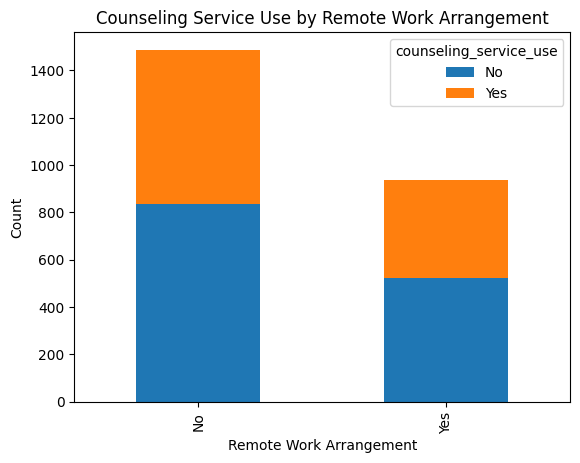

In [101]:
chart('remotely', 'counseling_service_use', 'Remote Work Arrangement', 
      'Count', 'Counseling Service Use by Remote Work Arrangement')

*Answer:* First, it's important to notice that we have only about 900 individuals who are working/studying remotely, compared to those who are in-person, which might impact our analysis. However, based on the available data, it appears that people who work/study remotely are less likely to use counseling services.

#### Does having a family history of mental health issues impact the use of counseling services?

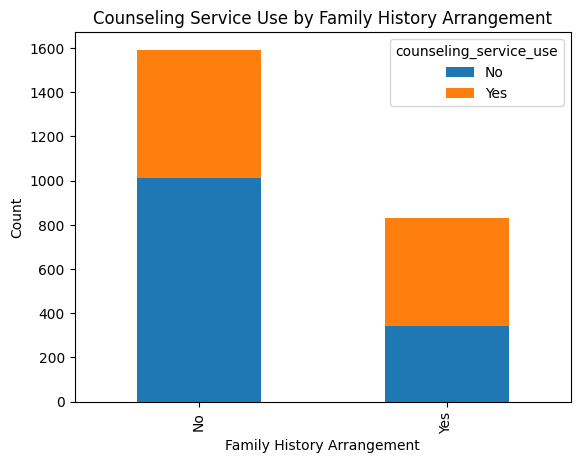

In [102]:
chart('family_history', 'counseling_service_use', 'Family History Arrangement', 
      'Count', 'Counseling Service Use by Family History Arrangement')

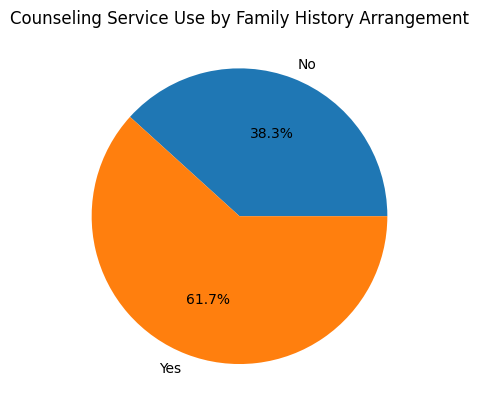

In [103]:
# pie
cross_tab = pd.crosstab(df['family_history'], df['counseling_service_use'])

# Calculate the percentage of counseling service use for each remote work arrangement
percentages = cross_tab['Yes'] / cross_tab.sum(axis=1)

# Create a pie chart
plt.pie(percentages, labels=cross_tab.index, autopct='%1.1f%%')

# Set the title
plt.title('Counseling Service Use by Family History Arrangement')

# Show the plot
plt.show()

*Answer:* In our dataset, we have more individuals with no family history. However, based on the charts, it is most likely to use counseling services if you have a family history. Interestingly, there is a noticeable number of people using counseling services even though they don't have a family history.

#### Is there a difference in social support levels between students and employees?

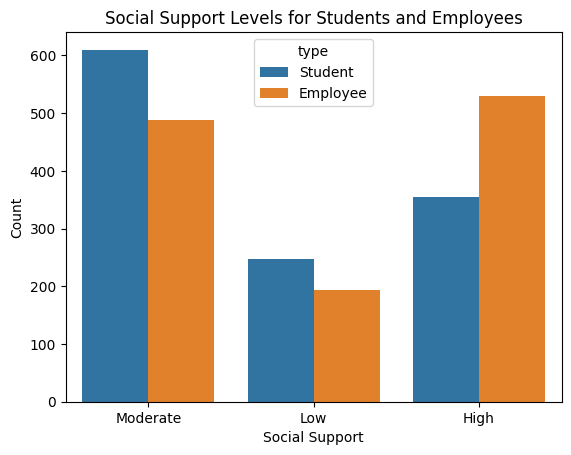

In [104]:
sns.countplot(x='social_support', hue='type', data=df)

# labels and title to the plot
plt.xlabel('Social Support')
plt.ylabel('Count')
plt.title('Social Support Levels for Students and Employees')

# Show the plot
plt.show()

*Answer:* There is no noticeable difference between students and employees in terms of social support levels, as clearly shown in the chart. Being an employee or a student does not seem to have an effect on the level of social support.

### **5.2:** Reflection

If I had more time, I would have loved to gather more data to address the "Data Collection Bias" issue that arose during our analysis to answer the questions: "Does the remote work arrangement affect the likelihood of using counseling services?" and "Does having a family history of mental health issues impact the use of counseling services?". Additionally, with more time, I would like to explore the following questions:

* How does age relate to the likelihood of a counseling services?
* Are there any associations between social support levels and family history of mental health issues?

By obtaining more data and conducting further analysis, we can gain a deeper understanding of these relationships and potentially uncover valuable insights.